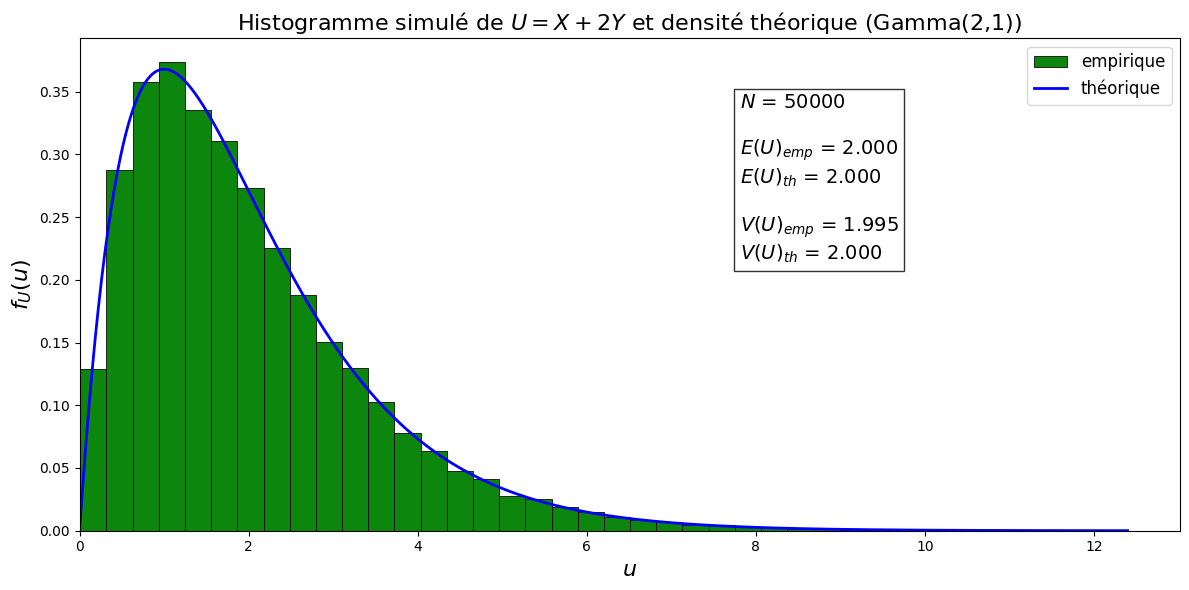

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ========== Paramètres ==========
np.random.seed(123)   # reproductibilité
N = 50000             # nombre d'expériences
bins = 40             # nombre de classes pour l'histogramme

# ========== Simulation ==========
# numpy.random.exponential prend 'scale' = 1/lambda
X = np.random.exponential(scale=1.0, size=N)   # Exp(1)
Y = np.random.exponential(scale=1/2.0, size=N) # Exp(2) -> scale = 1/2
U = X + 2.0 * Y

# ========== Statistiques empiriques ==========
E_emp = U.mean()
V_emp = U.var(ddof=0)   # variance empirique (population), ddof=0

# ========== Valeurs théoriques ==========
E_th = 2.0
V_th = 2.0

u_vals = np.linspace(0, U.max(), 1000)
f_theo = u_vals * np.exp(-u_vals)   # Gamma(2,1) density (Gamma(2)=1)

# ========== Tracé ==========
plt.figure(figsize=(12,6))

# histogramme empiriquement estimé (normalisé pour être une densité)
n, bins_edges, patches = plt.hist(U, bins=bins, density=True,
                                  alpha=0.95, edgecolor='black',
                                  color='green', linewidth=0.6, label='empirique')

# densité théorique en superposition
plt.plot(u_vals, f_theo, lw=2.0, color='blue', label='théorique')

# légende personnalisée (couleurs + styles)
plt.legend(loc='upper right', frameon=True, fontsize=12)

# annotations texte (N, Espérance et Variance empiriques et théoriques)
txt = (f"$N$ = {N}\n\n"
       f"$E(U)_{{emp}}$ = {E_emp:.3f}\n"
       f"$E(U)_{{th}}$ = {E_th:.3f}\n\n"
       f"$V(U)_{{emp}}$ = {V_emp:.3f}\n"
       f"$V(U)_{{th}}$ = {V_th:.3f}")
plt.gca().text(0.60, 0.55, txt, transform=plt.gca().transAxes,
               fontsize=14, bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

# axes et titre
plt.xlabel('$u$', fontsize=16)
plt.ylabel('$f_U(u)$', fontsize=16)
plt.title('Histogramme simulé de $U=X+2Y$ et densité théorique (Gamma(2,1))', fontsize=16)

# ajustements esthétiques
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(False)
plt.tight_layout()
plt.show()


Coefficients choisis :
a = -0.866, b = 0.500
Vérification : a^2 + b^2 = 1.000

Corrélations :
  corr(X,Y) théorique = 0.000, empirique = -0.008
  corr(X,Z) théorique = -0.866, empirique = -0.867
  corr(Y,Z) théorique = 0.500, empirique = 0.506

Écart-type de Z (empirique) = 1.004


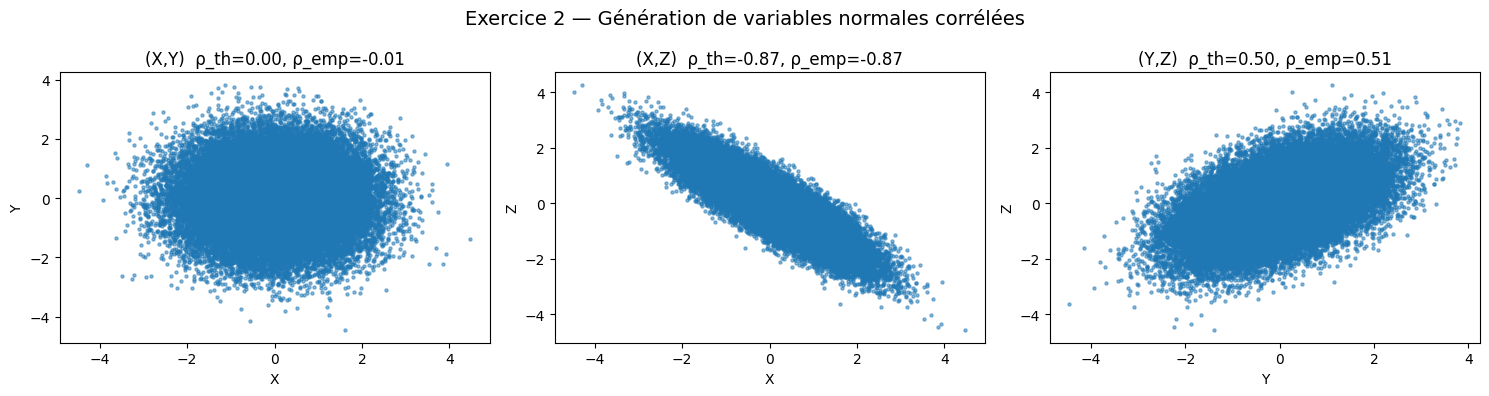

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================================
# EXERCICE 2 : Génération de deux variables corrélées
# ===============================================

# --- Paramètres ---
N = 50000                     # nombre d'expériences
rho_XZ = -np.sqrt(3)/2        # corrélation voulue entre X et Z
sigma_Z = 1                   # écart-type de Z voulu

# --- Calcul des coefficients a et b ---
# On veut Var(Z) = 1 -> a^2 + b^2 = 1
# donc a = rho_XZ (car corr(X,Z) = a / sqrt(a^2+b^2))
a = rho_XZ
b = np.sqrt(1 - a**2)         # choisir le signe positif pour b (possible aussi négatif)

print("Coefficients choisis :")
print(f"a = {a:.3f}, b = {b:.3f}")
print(f"Vérification : a^2 + b^2 = {a**2 + b**2:.3f}")

# --- Simulation de X et Y indépendantes ---
np.random.seed(42)
X = np.random.normal(0, 1, N)
Y = np.random.normal(0, 1, N)

# --- Construction de Z ---
Z = a * X + b * Y

# --- Corrélations théoriques ---
corr_XY_th = 0
corr_XZ_th = a
corr_YZ_th = b

# --- Corrélations empiriques ---
corr = np.corrcoef(np.vstack([X, Y, Z]))
corr_XY_emp = corr[0, 1]
corr_XZ_emp = corr[0, 2]
corr_YZ_emp = corr[1, 2]

print("\nCorrélations :")
print(f"  corr(X,Y) théorique = {corr_XY_th:.3f}, empirique = {corr_XY_emp:.3f}")
print(f"  corr(X,Z) théorique = {corr_XZ_th:.3f}, empirique = {corr_XZ_emp:.3f}")
print(f"  corr(Y,Z) théorique = {corr_YZ_th:.3f}, empirique = {corr_YZ_emp:.3f}")

# --- Vérification de l’écart-type de Z ---
print(f"\nÉcart-type de Z (empirique) = {Z.std():.3f}")

# --- Tracés des nuages de points ---
plt.figure(figsize=(15,4))

# (X,Y)
plt.subplot(1,3,1)
plt.scatter(X, Y, s=5, alpha=0.5)
plt.title(f"(X,Y)  ρ_th={corr_XY_th:.2f}, ρ_emp={corr_XY_emp:.2f}")
plt.xlabel("X")
plt.ylabel("Y")

# (X,Z)
plt.subplot(1,3,2)
plt.scatter(X, Z, s=5, alpha=0.5)
plt.title(f"(X,Z)  ρ_th={corr_XZ_th:.2f}, ρ_emp={corr_XZ_emp:.2f}")
plt.xlabel("X")
plt.ylabel("Z")

# (Y,Z)
plt.subplot(1,3,3)
plt.scatter(Y, Z, s=5, alpha=0.5)
plt.title(f"(Y,Z)  ρ_th={corr_YZ_th:.2f}, ρ_emp={corr_YZ_emp:.2f}")
plt.xlabel("Y")
plt.ylabel("Z")

plt.suptitle("Exercice 2 — Génération de variables normales corrélées", fontsize=14)
plt.tight_layout()
plt.show()


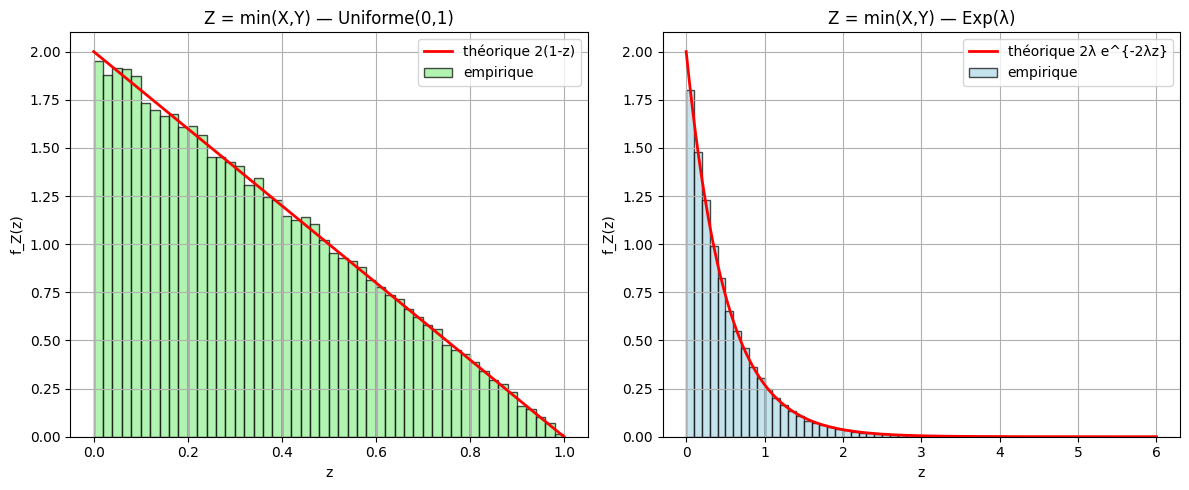

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Simulation du min(X,Y)
# ==============================

N = 100000  # nombre d'expériences
z = np.linspace(0, 1, 200)  # pour affichage

# ------------------------------
# CAS 1 : X, Y ~ Uniforme(0,1)
# ------------------------------
X = np.random.rand(N)
Y = np.random.rand(N)
Z = np.minimum(X, Y)

# Densité empirique
counts, bins = np.histogram(Z, bins=50, range=(0,1), density=True)
centers = 0.5*(bins[1:] + bins[:-1])

# Densité théorique : f_Z(z) = 2(1-z)
f_theo_uniform = 2*(1-z)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(centers, counts, width=0.02, color='lightgreen', edgecolor='black', alpha=0.7, label='empirique')
plt.plot(z, f_theo_uniform, 'r-', lw=2, label='théorique 2(1-z)')
plt.title("Z = min(X,Y) — Uniforme(0,1)")
plt.xlabel("z")
plt.ylabel("f_Z(z)")
plt.legend()
plt.grid(True)

# ------------------------------
# CAS 2 : X, Y ~ Exp(λ)
# ------------------------------
lam = 1.0
X = np.random.exponential(scale=1/lam, size=N)
Y = np.random.exponential(scale=1/lam, size=N)
Z = np.minimum(X, Y)

# Densité empirique
counts, bins = np.histogram(Z, bins=60, range=(0,6), density=True)
centers = 0.5*(bins[1:] + bins[:-1])

# Densité théorique : f_Z(z) = 2λ e^{-2λz}
z2 = np.linspace(0, 6, 300)
f_theo_exp = 2*lam*np.exp(-2*lam*z2)

plt.subplot(1,2,2)
plt.bar(centers, counts, width=0.1, color='lightblue', edgecolor='black', alpha=0.7, label='empirique')
plt.plot(z2, f_theo_exp, 'r-', lw=2, label='théorique 2λ e^{-2λz}')
plt.title("Z = min(X,Y) — Exp(λ)")
plt.xlabel("z")
plt.ylabel("f_Z(z)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
